<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/Aula_3_Matplotlib_W_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca Matplotlib




In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Linha

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Utilizando dados em Listas

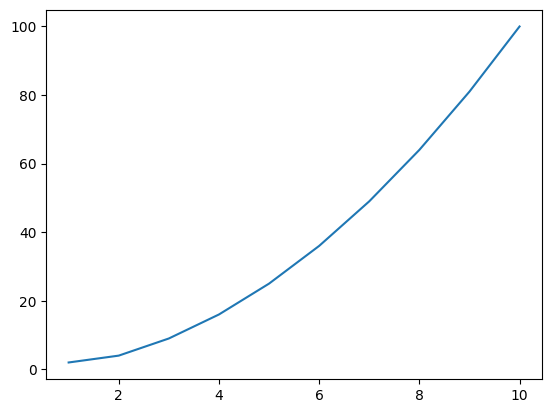

In [2]:
valores_x = [1,2,3,4,5,6,7,8,9,10]
valores_y = [2,4,9,16,25,36,49,64,81,100]

plt.plot(valores_x, valores_y)
plt.show()

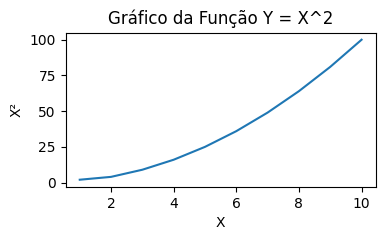

In [5]:
plt.figure(figsize=(4,2)) # definindo tamanho do gráfico
plt.plot(valores_x, valores_y)
plt.xlabel("X")
plt.ylabel("X²")
plt.title("Gráfico da Função Y = X^2")
plt.show()

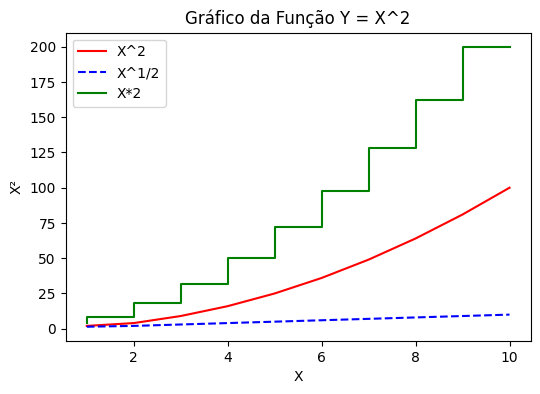

In [6]:
plt.figure(figsize=(6,4)) # definindo tamanho do gráfico
plt.plot(valores_x, valores_y, color="red", label="X^2")
plt.plot(valores_x, list(map(lambda x: x**(1/2), valores_y)), color="blue", linestyle="--", label="X^1/2")
plt.plot(valores_x, list(map(lambda x: x*2, valores_y)), color="green", drawstyle="steps", label="X*2")
plt.xlabel("X")
plt.ylabel("X²")
plt.title("Gráfico da Função Y = X^2")
plt.legend(loc="upper left")
plt.show()

### A partir de DataFrame

In [43]:
df_cerveja = pd.read_csv("https://raw.githubusercontent.com/mateusqc/datasets/main/consumo_cerveja.csv", decimal=",")

In [9]:
df_cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [10]:
df_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


In [11]:
df_cerveja["Data"] = pd.to_datetime(df_cerveja["Data"])

In [13]:
df_cerveja["Data"]

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
936          NaT
937          NaT
938          NaT
939          NaT
940          NaT
Name: Data, Length: 941, dtype: datetime64[ns]

In [14]:
df_cerveja["Consumo de cerveja (litros)"] = df_cerveja["Consumo de cerveja (litros)"].astype(float)
df_cerveja["Consumo de cerveja (litros)"]

0      25.461
1      28.972
2      30.814
3      29.799
4      28.900
        ...  
936       NaN
937       NaN
938       NaN
939       NaN
940       NaN
Name: Consumo de cerveja (litros), Length: 941, dtype: float64

In [15]:
df_cerveja.dropna(subset=["Data"], inplace=True)

In [16]:
df_cerveja.isna().any()

Data                           False
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

Realizando filtro de forma a utilizar os dados apenas do mês de Janeiro de 2015

In [17]:
df_cerveja_mes = df_cerveja[df_cerveja["Data"] <= '2015-02-01']

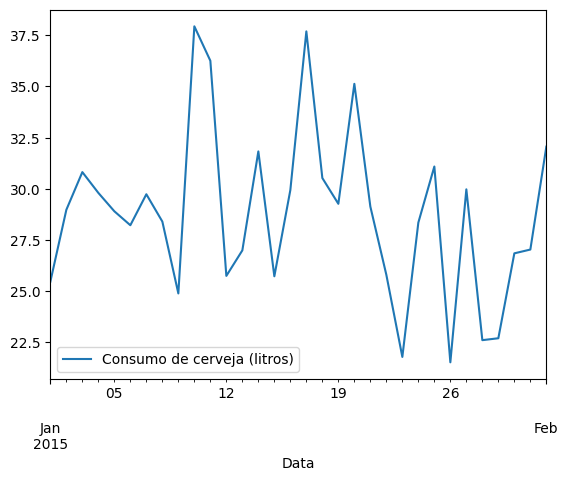

In [18]:
df_cerveja_mes.plot(x="Data", y="Consumo de cerveja (litros)")
plt.show()

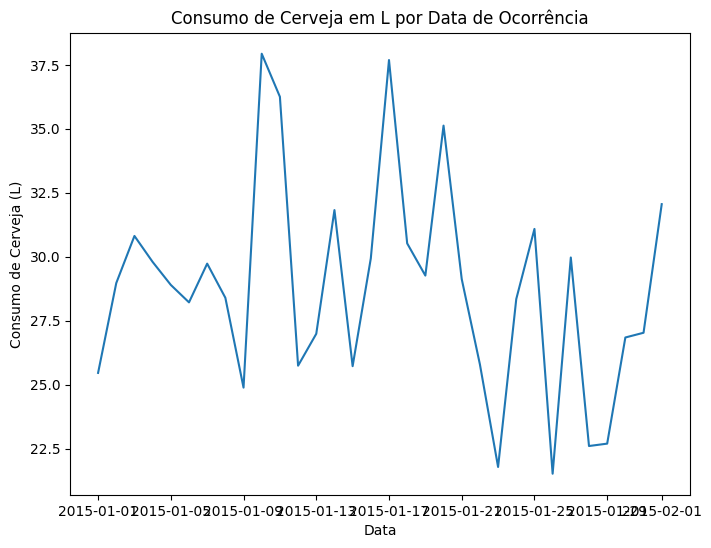

In [19]:
plt.figure(figsize=(8,6)) # definindo tamanho do gráfico
plt.plot(df_cerveja_mes["Data"], df_cerveja_mes["Consumo de cerveja (litros)"])
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico
plt.show()

Corrigindo labels inferiores sobrepostos:

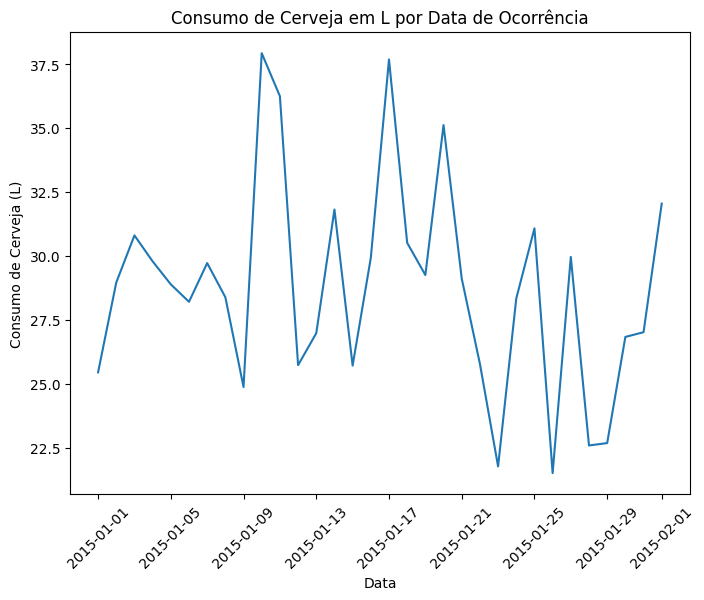

In [20]:
plt.figure(figsize=(8,6)) # dfinindo tamanho do gráfico
plt.plot(df_cerveja_mes["Data"], df_cerveja_mes["Consumo de cerveja (litros)"])
plt.xticks(rotation=45) # rotacionando "ticks", ou labels, dos valores do eixo X
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico
plt.show()

## Scatter - Dispersão

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [22]:
df_cerveja.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

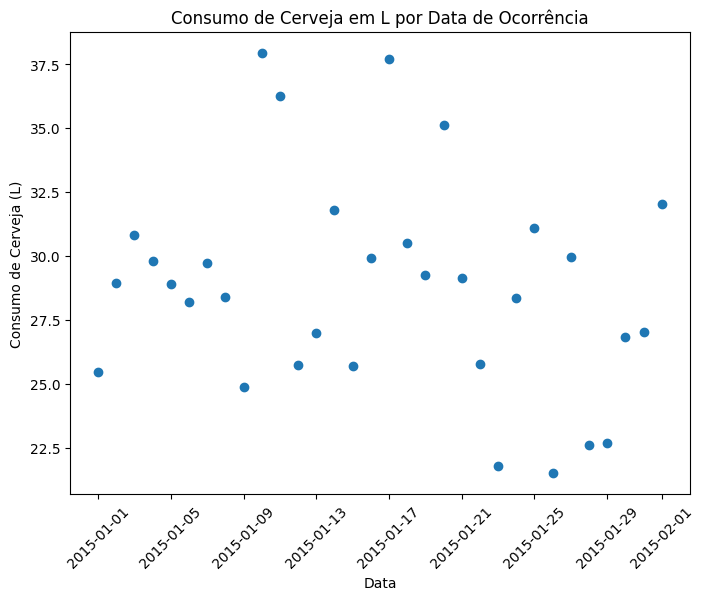

In [27]:
plt.figure(figsize=(8,6)) # dfinindo tamanho do gráfico
plt.scatter(df_cerveja_mes["Data"], df_cerveja_mes["Consumo de cerveja (litros)"])
plt.xticks(rotation=45) # rotacionando "ticks", ou labels, dos valores do eixo X
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico
plt.show()

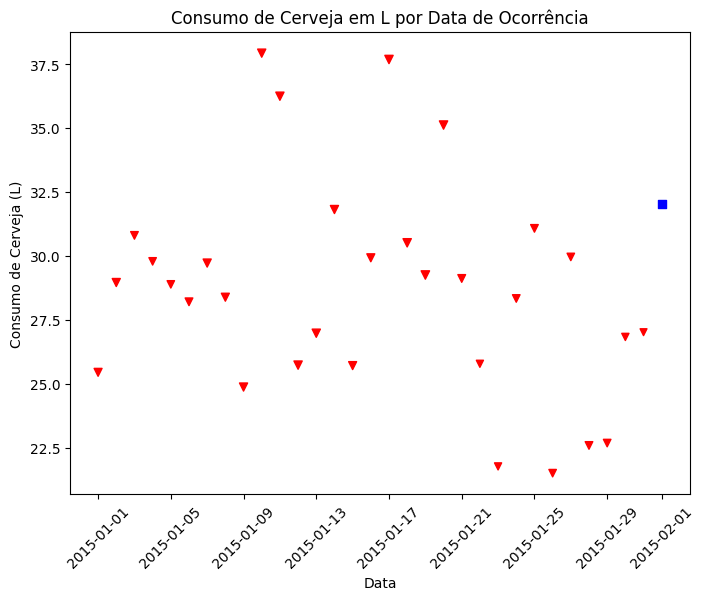

In [35]:
plt.figure(figsize=(8,6)) # dfinindo tamanho do gráfico
plt.scatter(x="Data", y="Consumo de cerveja (litros)", c="red", marker="v", s="Temperatura Maxima (C)", data=df_cerveja_mes[:31])
plt.scatter(x="Data", y="Consumo de cerveja (litros)", c="blue", marker="s", s="Temperatura Maxima (C)", data=df_cerveja_mes[31:])
plt.xticks(rotation=45) # rotacionando "ticks", ou labels, dos valores do eixo X
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico
plt.show()

### Normalizando valores
Normalizando valores de temperatura máxima para 0 ~ 100:

In [36]:
max_val = df_cerveja_mes["Temperatura Maxima (C)"].max()
min_val = df_cerveja_mes["Temperatura Maxima (C)"].min()
size_values = df_cerveja_mes["Temperatura Maxima (C)"].apply(lambda x: (x-min_val)/(max_val-min_val) * 100)
size_values

0      67.213115
1      75.409836
2      45.901639
3      35.245902
4      32.786885
5      50.819672
6      77.049180
7      69.672131
8      79.508197
9      81.147541
10     86.065574
11     90.983607
12     86.065574
13     79.508197
14     69.672131
15     68.852459
16     94.262295
17     92.622951
18    100.000000
19     92.622951
20     54.098361
21     14.754098
22     14.754098
23     41.803279
24     46.721311
25     36.065574
26     36.065574
27     45.901639
28     40.163934
29     21.311475
30      0.000000
31     30.327869
Name: Temperatura Maxima (C), dtype: float64

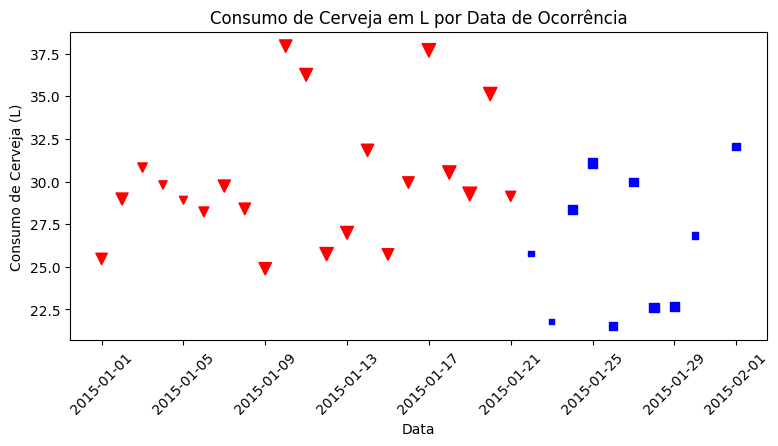

In [46]:
plt.figure(figsize=(9,4)) # dfinindo tamanho do gráfico
plt.scatter(x="Data", y="Consumo de cerveja (litros)", c="red", marker="v", s=size_values[:21], data=df_cerveja_mes[:21], label="Janeiro")
plt.scatter(x="Data", y="Consumo de cerveja (litros)", c="blue", marker="s", s=size_values[21:], data=df_cerveja_mes[21:], label="Fevereiro")
plt.xticks(rotation=45) # rotacionando "ticks", ou labels, dos valores do eixo X
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico
plt.show()

### Subplots

In [ ]:
plt.figure(figsize=(12,4)) # definindo tamanho do gráfico

plt.subplot(121)
plt.scatter(x="Data", y="Consumo de cerveja (litros)", c="Temperatura Maxima (C)", s=size_values, data=df_cerveja_mes)
plt.xticks(rotation=45) # rotacionando "ticks", ou labels, dos valores do eixo X
plt.xlabel("Data") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Data de Ocorrência") # titulo do grafico

plt.subplot(122)
plt.scatter(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=df_cerveja_mes)
plt.xlabel("Temperatura Maxima (C)") # titulo do eixo X
plt.ylabel("Consumo de Cerveja (L)") # titulo do eixo Y
plt.title("Consumo de Cerveja em L por Temperatura Maxima (C)") # titulo do grafico

plt.show()

### Agrupar dados por Mês - Time Range

## Barras

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

### Importando Dados - IGM

Dados do Índice de Governança Municipal.

Lançado em 2016, o Índice de Governança Municipal (IGM-CFA) consiste em uma métrica da governança pública nos municípios brasileiros a partir de três dimensões: Finanças, Gestão e Desempenho.

Fonte: https://www.ipm.com.br/noticias/administracao-geral-noticias/indice-de-governanca-municipal-2021-clientes-ipm-sao-destaque-no-brasil/#:~:text=Lan%C3%A7ado%20em%202016%2C%20o%20%C3%8Dndice,%3A%20Finan%C3%A7as%2C%20Gest%C3%A3o%20e%20Desempenho.

In [ ]:
url='https://drive.google.com/uc?id=1IJPSBCA5PtirkTjw831LxtWSnsjXUpw5'
df = pd.read_csv(url, sep= ";", decimal=",")

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.corr()["idhm"]

### Análise

In [ ]:
df["porte"].value_counts().plot(kind="barh")
plt.show()

In [ ]:
value_counts = df["porte"].value_counts()
categories = value_counts.index
values = value_counts.values

In [ ]:
plt.figure(figsize=(9,5)) # dfinindo tamanho do gráfico
plt.bar(categories, values) # tipo de gráfico de barra horizontal
plt.ylabel('Tipos de Porte') # definindo texto do eixo Y
plt.xlabel('Quantidade de Municípios') # definindo texto do eixo X
plt.title('Quantidade de Municípios por Porte') # definindo texto do título
plt.show() # exibindo gráfico

## Histograma

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
df["idhm"].plot(kind="hist")

In [ ]:
plt.hist(df["idhm"], histtype='step', density = True)
plt.show()

In [ ]:
plt.hist(df['participacao_transf_receita'],20, color="#ffca99")
plt.show()

Outro formato de visualizar o KDE:

In [ ]:
df['participacao_transf_receita'].plot.density()
plt.show()

In [ ]:
plt.hist(df["idhm"], 20, color="purple")
plt.savefig("arquivo_grafico.png")

## Pizza

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [ ]:
df.regiao.value_counts()

In [ ]:
plt.pie(x=df.regiao.value_counts().values, labels=df.regiao.value_counts().index)
plt.show()

In [ ]:
plt.pie(explode=[0.2, 0, 0.5, 0, 0], autopct=lambda x: "%.2f%%" % x, x=df.regiao.value_counts().values, labels=df.regiao.value_counts().index, shadow=True)
plt.show()

In [ ]:
total = df.regiao.value_counts().values.sum()
total

In [ ]:
df.regiao.value_counts()

In [ ]:
def build_label(value_perc):
  value = value_perc*total/100
  return "%d (%.2f%%)" % (value, value_perc)


In [ ]:
plt.pie(explode=[0.2, 0, 0, 0.4, 0], autopct=build_label, colors=["#ff6961", "#77dd77", "#fdfd96", "#84b6f4", "#fdcae1"], x=df.regiao.value_counts().values, labels=df.regiao.value_counts().index, shadow=True)
plt.title("Parcela de Municípios por Região Brasileira")
plt.show()

## Boxplot

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In [ ]:
df_filtrado = df[["regiao", "exp_vida"]]
df_filtrado.head()

In [ ]:
df_filtrado.boxplot(column='exp_vida', by = 'regiao')
plt.show()

In [ ]:
regiao_list = df_filtrado.regiao.value_counts().index.tolist()
regiao_list

In [ ]:
data = []
for regiao in regiao_list:
  data.append(df_filtrado[df_filtrado["regiao"] == regiao]["exp_vida"].tolist()[:50])

In [ ]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data, labels=regiao_list,vert= True)
plt.show()

### Alternativa Seaborn

Documentação: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.boxplot(data=df_filtrado, x="regiao", y="exp_vida")
ax.set(xlabel="Expectativa de Vida (Anos)", ylabel= "Região", title="Distribuição da Expectativa de Vida (Anos) por Região Brasileira")
plt.show()

In [ ]:
sns.boxplot(data=df_filtrado, x="exp_vida", y="regiao", orient="h", hue="regiao")
plt.show()

## Violino

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

In [ ]:
plt.violinplot(data, vert=False)
plt.show()

Documentação: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [ ]:
ax = sns.violinplot(data=df_filtrado, x="exp_vida", y="regiao")
ax.set(xlabel="Expectativa de Vida (Anos)", ylabel= "Região", title="Distribuição da Expectativa de Vida (Anos) por Região Brasileira")
plt.show()